In [ ]:
""" utility notebook for checking/opening new ex[periment
"""

In [1]:

%load_ext autoreload
%autoreload 2

%cd ..

from analysis.getModelHumanDists import * 
from analysis.modelAnalyses import *
from analysis.importDrawgood import *
from analysis.utils import *

/data1/code/python/ec


In [100]:
DAT = loadCheckpoint(trainset="S12.inv.S12skew.1.test", loadbehavior=False)

Loading dreamcoder checkpoint
experimentOutputs/draw//2020-05-15T23:30:02.909195/draw_aic=1.0_ar=2_BO=True_CO=True_dp=True_shp=False_ES=1_ET=10_HR=0.5_I=S12skew_it=17_MF=5_nCons=False_parTes=True_pc=30_RT=2400_RR=False_RW=False_st=False_solver=ocaml_STM=True_L=1.5_TRR=unsolved_K=2_topkNotMAP=False_tset=S12_cs=2.pickle
0
----
experimentOutputs/draw//2020-05-15T23:30:02.909195/draw_aic=1.0_ar=2_BO=True_CO=True_dp=True_shp=False_ES=1_ET=10_HR=0.5_I=S12skew_it=17_MF=5_nCons=False_parTes=True_pc=30_RT=2400_RR=False_RW=False_st=False_solver=ocaml_STM=True_L=1.5_TRR=unsolved_K=2_topkNotMAP=False_tset=S12_cs=2_graph=True.pickle
17
----
[got from filename] use_cogsci_prim=2
Loading dreamcoder tasks
DRAW TASK training set: S12
DO SHAPING: False
training task names:
['S12_13_shaping_0', 'S12_13_shaping_1', 'S12_13_shaping_2', 'S12_13_shaping_3', 'S12_13_shaping_4', 'S12_13_shaping_5', 'S12_13_shaping_6', 'S12_13_shaping_7', 'S12_13_shaping_8', 'S12_13_shaping_9', 'S12_13_shaping_10', 'S12_1', 'S1

In [101]:
DAT["dc_filename"]

'experimentOutputs/draw//2020-05-15T23:30:02.909195/draw_aic=1.0_ar=2_BO=True_CO=True_dp=True_shp=False_ES=1_ET=10_HR=0.5_I=S12skew_it=17_MF=5_nCons=False_parTes=True_pc=30_RT=2400_RR=False_RW=False_st=False_solver=ocaml_STM=True_L=1.5_TRR=unsolved_K=2_topkNotMAP=False_tset=S12_cs=2_graph=True.pickle'

In [105]:
f = 'experimentOutputs/draw//2020-05-15T23:30:02.909195/draw_aic=1.0_ar=2_BO=True_CO=True_dp=True_shp=False_ES=1_ET=10_HR=0.5_I=S12skew_it=17_MF=5_nCons=False_parTes=True_pc=30_RT=2400_RR=False_RW=False_st=False_solver=ocaml_STM=True_L=1.5_TRR=unsolved_K=2_topkNotMAP=False_tset=S12_cs=2.pickle'
with open(f, "rb") as F:
    res = pickle.load(F)

In [114]:
tasks = DAT["tasks"]
A = res.recognitionModel.taskEmbeddings(tasks)


In [116]:
res.recognitionModel

RecognitionModel(
  (featureExtractor): DrawCNN(
    (encoder): Sequential(
      (0): Sequential(
        (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (2): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (3): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (4): Flatten()
    )
  )
  (_MLP): Sequential(


In [117]:
A[tasks[0]].shape



(1024,)

TypeError: forward() missing 1 required positional argument: 'features'

In [143]:
import torch

T = torch.tensor(tasks[0].rendered_strokes).float()

In [144]:
res.recognitionModel.to("cpu")(T)

RuntimeError: size mismatch, m1: [128 x 128], m2: [1024 x 64] at /opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/TH/generic/THTensorMath.cpp:136

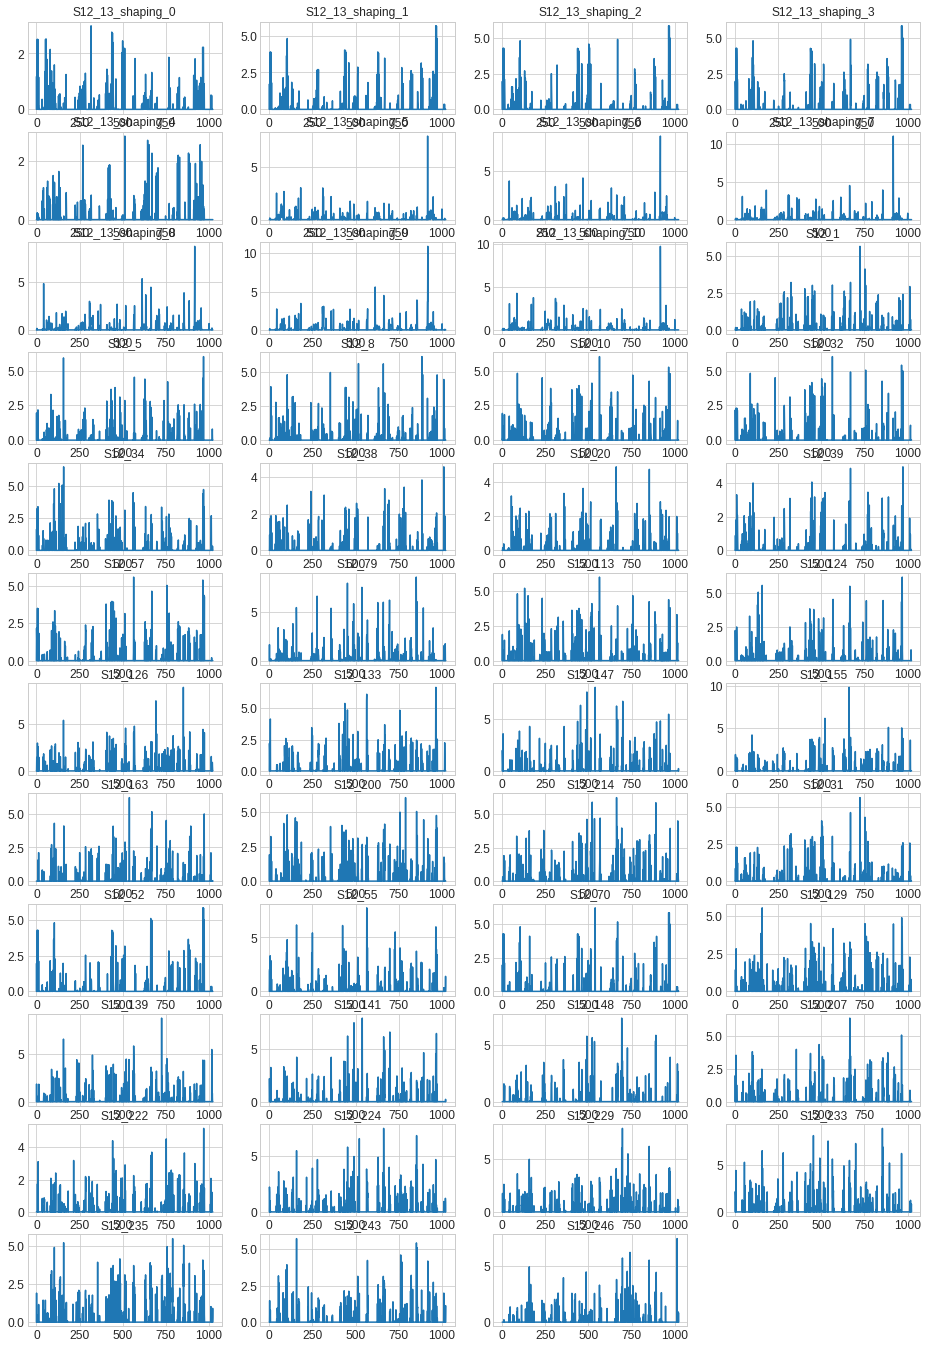

In [124]:


ncols = 4
nrows = int(np.ceil(len(tasks)/ncols))
plt.figure(figsize=(4*4,nrows*2))

for i, t in enumerate(tasks):
    
    plt.subplot(nrows, ncols, i+1)
    plt.title(str(t))
        
    a = A[t]
    ax = plt.plot(a, '-')
    

In [44]:
DAT["tasks"][20].request

tstroke

In [65]:
str(DAT["result"].frontiersOverTime[DAT["tasks"][20]][-1].entries[0].program.infer())

't0 -> tstroke'

In [34]:
dir(DAT["result"].frontiersOverTime[DAT["tasks"][20]][-1].entries[0].program)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_parse',
 'annotateTypes',
 'applicationParse',
 'applicationParses',
 'betaNormalForm',
 'betaReduce',
 'body',
 'canHaveType',
 'clone',
 'closed',
 'evaluate',
 'evaluateAndCollectSteps',
 'freeVariables',
 'hashCode',
 'infer',
 'inferType',
 'isAbstraction',
 'isApplication',
 'isBetaLong',
 'isHole',
 'isIndex',
 'isInvented',
 'isPrimitive',
 'isUnion',
 'numberOfFreeVariables',
 'parse',
 'parseConstant',
 'parseHumanReadable',
 'runWithArguments',
 'shift',
 'show',
 'size',
 'substitute',
 'uncurry',
 'visit',
 'walk',
 'walkUncurried',
 'wellTyped']

In [19]:
DAT["tasks"][20]

Task(name=S12_57, request=tstroke, examples=[]

In [6]:
t = "abc"
t.find("d")


-1

In [90]:
from dreamcoder.domains.draw.main import dreamFromGrammar


dreams = dreamFromGrammar(USE_NEW_PRIMITIVES=True, N=2)
print(dreams[0])
dreams[0].evaluate([])([])

(lambda (reflectC (lambda (repeatC (lambda $0) rep3 (transmat (Some scale7) None (Some dist3) None None) $0)) angle3 (circleC (transformC (lambda $0) (transmat (Some scale7) None None None (Some srt)) $0))))


[array([[ 5.00000000e-01,  0.00000000e+00],
        [ 4.88310278e-01,  1.07485220e-01],
        [ 4.53787710e-01,  2.09944551e-01],
        [ 3.98046533e-01,  3.02587108e-01],
        [ 3.23693142e-01,  3.81081028e-01],
        [ 2.34204220e-01,  4.41756022e-01],
        [ 1.33764169e-01,  4.81774996e-01],
        [ 2.70694543e-02,  4.99266707e-01],
        [-8.08909983e-02,  4.93413261e-01],
        [-1.85069078e-01,  4.64488360e-01],
        [-2.80593533e-01,  4.13844499e-01],
        [-3.62997746e-01,  3.43849729e-01],
        [-4.28428588e-01,  2.57776929e-01],
        [-4.73826586e-01,  1.59650765e-01],
        [-4.97068979e-01,  5.40595092e-02],
        [-4.97068979e-01, -5.40595092e-02],
        [-4.73826586e-01, -1.59650765e-01],
        [-4.28428588e-01, -2.57776929e-01],
        [-3.62997746e-01, -3.43849729e-01],
        [-2.80593533e-01, -4.13844499e-01],
        [-1.85069078e-01, -4.64488360e-01],
        [-8.08909983e-02, -4.93413261e-01],
        [ 2.70694543e-02, -4.992

In [99]:
DAT["savedir"]

'experimentOutputs/draw/2020-05-15T23:30:02.909195'

In [98]:
DAT.keys()

dict_keys(['trainset', 'result', 'tasks', 'testtasks', 'programnames', 'programnames_test', 'behaviorexpt', 'savedir', 'parses', 'analysavedir', 'summarysavedir', 'loadparse', 'taskresultdict', 'savedir_datsegs', 'datflatsavedir', 'savedir_modelhudist', 'savedir_parseanalysis', 'savedir_parseanalysis_good'])